In [1]:
data <- read.csv("new_chrY_static_classified.csv")
head(data,10)
# tail(data,10)
# head(read.csv("new_chr19_static_classified.csv"))

X,binID,start,cata,aRead,bRead,aNorm,bNorm
10082,chrY_132200,132100,3,21,43,60.000000,68.253968
3635,chrY_132200,132100,2,14,20,40.000000,31.746032
10083,chrY_134700,134600,3,28,44,77.777778,89.795918
3636,chrY_134700,134600,2,6,1,16.666667,2.040816
1,chrY_134700,134600,1,2,4,5.555556,8.163265
10084,chrY_141900,141800,3,16,22,88.888889,91.666667
3637,chrY_141900,141800,2,2,2,11.111111,8.333333
10085,chrY_144900,144800,3,49,38,80.327869,84.444444
3638,chrY_144900,144800,2,8,5,13.114754,11.111111
2,chrY_144900,144800,1,4,2,6.557377,4.444444


In [2]:
high_sub <- data[data$cata == 3, c("binID", "start", "aRead")]
names(high_sub) <- c("binID", "start", "high")
# head(high_sub)
medium_sub <- data[data$cata == 2, c("binID", "start", "aRead")]
names(medium_sub) <- c("binID", "start", "medium")
# head(medium_sub)
low_sub <- data[data$cata == 1, c("binID", "start", "aRead")]
names(low_sub) <- c("binID", "start", "low")
# head(low_sub)

# merge
clusterdf <- merge(high_sub, medium_sub, all = TRUE)
clusterdf <- merge(clusterdf, low_sub, all = TRUE)
clusterdf <- clusterdf[order(as.numeric(clusterdf$start)),]
clusterdf[is.na(clusterdf)] <- 0
head(clusterdf,10)

,binID,start,high,medium,low
559,chrY_132200,132100,21,14,0
580,chrY_134700,134600,28,6,2
641,chrY_141900,141800,16,2,0
651,chrY_144900,144800,49,8,4
708,chrY_171300,171200,129,53,28
733,chrY_174500,174400,8,4,4
770,chrY_180300,180200,38,2,0
906,chrY_196400,196300,4,7,0
1033,chrY_204500,204400,48,0,0
1719,chrY_262400,262300,20,2,0


In [3]:
paste("Total number of Bins:", nrow(clusterdf))

[1] "Total number of Bins: 8153"

In [4]:
# write.csv(clusterdf, "A_clusterdf_count.csv")

In [5]:
dist_tolerance <- 100
# meth_tolerance <- 40 
# cor_2_cutoff <- 0.9
alpha <- 0.05

In [6]:
pre.row <- clusterdf[1,]

dist.fun <- function(row) {
    dist <- as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"]))
    pre.row <<- row
    return(c(row["binID"], row["start"], row["high"], row["medium"], row["low"], dist = dist)) 
}

dist.result <- t(apply(clusterdf, 1, dist.fun))
dist.result <- as.data.frame(dist.result)
head(dist.result, 30)

,binID,start,high,medium,low,dist
559,chrY_132200,132100,21,14,0,0
580,chrY_134700,134600,28,6,2,2500
641,chrY_141900,141800,16,2,0,7200
651,chrY_144900,144800,49,8,4,3000
708,chrY_171300,171200,129,53,28,26400
733,chrY_174500,174400,8,4,4,3200
770,chrY_180300,180200,38,2,0,5800
906,chrY_196400,196300,4,7,0,16100
1033,chrY_204500,204400,48,0,0,8100
1719,chrY_262400,262300,20,2,0,57900


In [7]:
dist.result <- dist.result[as.numeric(as.character(dist.result$dist)) <= dist_tolerance, ]
head(dist.result)

dist.result <- dist.result[-1,]
head(dist.result)
nrow(dist.result)

,binID,start,high,medium,low,dist
559,chrY_132200,132100,21,14,0,0
5458,chrY_694200,694100,8,0,0,100
5459,chrY_694300,694200,42,0,0,100
5460,chrY_694400,694300,11,0,0,100
5462,chrY_694500,694400,12,0,0,100
5465,chrY_695200,695100,29,4,0,100


,binID,start,high,medium,low,dist
5458,chrY_694200,694100,8,0,0,100
5459,chrY_694300,694200,42,0,0,100
5460,chrY_694400,694300,11,0,0,100
5462,chrY_694500,694400,12,0,0,100
5465,chrY_695200,695100,29,4,0,100
5521,chrY_702100,702000,17,0,0,100


[1] 1121

In [8]:
start.pos <- dist.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   694000   694100   694200   694300   694400   695000   695100   701900
   [9]   702000   702800   702900   703000   703100   703600   703700   704500
  [17]   704600   704700   704800   704900   708400   708500   708600   709000
  [25]   709100   710100   710200   715400   715500   725400   725500   753000
  [33]   753100   754000   754100   763700   763800   847000   847100   847500
  [41]   847600   854800   854900   861300   861400   865100   865200   877900
  [49]   878000   884900   885000   885100   891200   891300   896900   897000
  [57]   905600   905700   914000   914100   918900   919000   927700   927800
  [65]   931600   931700   932400   932500   932600   932700   953000   953100
  [73]   954400   954500   954700   954800   954900   956100   956200   956400
  [81]   956500   956600   957100   957200   957300   960300   960400   960500
  [89]   962500   962600   963500   963600   963700   963800   984300   984400
  [97]   990500   990600   996100   996200  1022200  1022300  1027000  1027100
 [105]  1111400  1111500  1120000  1120100  1120200  1120300  1120500  1120600
 [113]  1171900  1172000  1172100  1172200  1174300  1174400  1199900  1200000
 [121]  1200600  1200700  1220800  1220900  1221000  1221500  1221600  1245700
 [129]  1245800  1253800  1253900  1260400  1260500  1260600  1265000  1265100
 [137]  1268700  1268800  1268900  1269000  1269100  1271300  1271400  1272000
 [145]  1272100  1273800  1273900  1274200  1274300  1275500  1275600  1275700
 [153]  1276900  1277000  1277100  1278100  1278200  1278300  1278400  1279400
 [161]  1279500  1309800  1309900  1359300  1359400  1368100  1368200  1404900
 [169]  1405000  1426800  1426900  1459000  1459100  1459200  1459500  1459600
 [177]  1462000  1462100  1732600  1732700  1769600  1769700  1780800  1780900
 [185]  1795300  1795400  1800900  1801000  1801100  1801200  1801300  1819200
 [193]  1819300  1823300  1823400  1824500  1824600  1825100  1825200  1836300
 [201]  1836400  1856100  1856200  1883800  1883900  1884400  1884500  1885700
 [209]  1885800  1887200  1887300  1888800  1888900  1889000  1889900  1890000
 [217]  1890100  1890200  1890300  1891100  1891200  1895300  1895400  1896300
 [225]  1896400  1897800  1897900  1898300  1898400  1898500  1898700  1898800
 [233]  1899300  1899400  1899500  1900000  1900100  1900200  1935300  1935400
 [241]  1938200  1938300  1990700  1990800  1990900  1991000  2002500  2002600
 [249]  2017300  2017400  2019600  2019700  2039700  2039800  2042800  2042900
 [257]  2044600  2044700  2072800  2072900  2073500  2073600  2073700  2073800
 [265]  2077900  2078000  2078200  2078300  2078400  2095200  2095300  2192200
 [273]  2192300  2204300  2204400  2206400  2206500  2206800  2206900  2208100
 [281]  2208200  2208300  2208400  2263700  2263800  2282600  2282700  2283700
 [289]  2283800  2286200  2286300  2293800  2293900  2309400  2309500  2313800
 [297]  2313900  2314400  2314500  2347900  2348000  2360900  2361000  2362600
 [305]  2362700  2362900  2363000  2365800  2365900  2383300  2383400  2403600
 [313]  2403700  2407600  2407700  2412600  2412700  2413000  2413100  2427300
 [321]  2427400  2439600  2439700  2439800  2439900  2449800  2449900  2475800
 [329]  2475900  2476000  2481300  2481400  2481500  2481600  2491600  2491700
 [337]  2503000  2503100  2516100  2516200  2524000  2524100  2546800  2546900
 [345]  2553700  2553800  2557500  2557600  2586500  2586600  2587300  2587400
 [353]  2596100  2596200  2599600  2599700  2605500  2605600  2605900  2606000
 [361]  2664100  2664200  2700600  2700700  2706300  2706400  2720000  2720100
 [369]  2728100  2728200  2738900  2739000  2739900  2740000  2742500  2742600
 [377]  2742700  2742800  2756300  2756400  2756500  2756600  2758100  2758200
 [385]  2758800  2758900  2759900  2760000  2761500  2761600  2763000  2763100
 [393]  2763700  2763800  3335600  3335700  3335800  3825600  3825700  3827300
 [401]  3827400  3836200  3836300  3840400  3840500  

In [9]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
dist.result <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
5455,chrY_694100,694000,49,0,1
5458,chrY_694200,694100,8,0,0
5459,chrY_694300,694200,42,0,0
5460,chrY_694400,694300,11,0,0
5462,chrY_694500,694400,12,0,0
5463,chrY_695100,695000,16,7,0
5465,chrY_695200,695100,29,4,0
5520,chrY_702000,701900,40,7,9
5521,chrY_702100,702000,17,0,0
5527,chrY_702900,702800,15,12,0


In [10]:
pre.row <- dist.result[1,]

test.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = "0"))
    } else {
        test.matrix <- cbind(c(as.numeric(as.character(pre.row["high"])),
                               as.numeric(as.character(pre.row["medium"])),
                               as.numeric(as.character(pre.row["low"]))),
                             c(as.numeric(as.character(row["high"])), 
                               as.numeric(as.character(row["medium"])),
                               as.numeric(as.character(row["low"]))))
        test.matrix <- test.matrix[rowSums(test.matrix) > 0, ]
        value <- suppressWarnings(chisq.test(test.matrix)$p.value)
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = as.character(value)))
    }
}

test.result <- apply(dist.result[-1,], MARGIN = 1, FUN = test.fun)
test.result <- t(test.result)
test.result <- as.data.frame(test.result)
head(test.result)

,binID,start,p.value
5458,chrY_694200,694100,1
5459,chrY_694300,694200,1.52199336286228e-06
5460,chrY_694400,694300,2.06100294125661e-05
5462,chrY_694500,694400,0.834827329185239
5463,chrY_695100,695000,0
5465,chrY_695200,695100,0.175363672841307


In [11]:
good.result <- test.result[as.numeric(as.character(test.result$p.value)) > alpha,]
head(good.result)

,binID,start,p.value
5458,chrY_694200,694100,1
5462,chrY_694500,694400,0.834827329185239
5465,chrY_695200,695100,0.175363672841307
5532,chrY_703200,703100,0.212890309746356
5536,chrY_703800,703700,0.0607885524134241
5542,chrY_704700,704600,0.128016891287232


In [12]:
start.pos <- good.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   694000   694100   694300   694400   695000   695100   703000   703100
   [9]   703600   703700   704500   704600   704800   704900   708500   708600
  [17]   710100   710200   715400   715500   725400   725500   754000   754100
  [25]   763700   763800   847000   847100   847500   847600   854800   854900
  [33]   861300   861400   877900   878000   884900   885000   891200   891300
  [41]   914000   914100   918900   919000   927700   927800   932400   932500
  [49]   932600   953000   953100   954700   954800   954900   956100   956200
  [57]   956400   956500   956600   957100   957200   957300   960300   960400
  [65]   962500   962600   963600   963700   963800   984300   984400   990500
  [73]   990600   996100   996200  1022200  1022300  1027000  1027100  1120000
  [81]  1120100  1120200  1120500  1120600  1171900  1172000  1174300  1174400
  [89]  1199900  1200000  1200600  1200700  1220800  1220900  1221000  1221500
  [97]  1221600  1253800  1253900  1260500  1260600  1265000  1265100  1268700
 [105]  1268800  1268900  1269000  1269100  1273800  1273900  1274200  1274300
 [113]  1275500  1275600  1275700  1278100  1278200  1279400  1279500  1309800
 [121]  1309900  1359300  1359400  1404900  1405000  1780800  1780900  1795300
 [129]  1795400  1800900  1801000  1801100  1801200  1801300  1823300  1823400
 [137]  1883800  1883900  1884400  1884500  1885700  1885800  1887200  1887300
 [145]  1889900  1890000  1890100  1890200  1891100  1891200  1897800  1897900
 [153]  1898300  1898400  1898500  1898700  1898800  1899300  1899400  1938200
 [161]  1938300  1990800  1990900  1991000  2002500  2002600  2017300  2017400
 [169]  2019600  2019700  2039700  2039800  2073700  2073800  2078200  2078300
 [177]  2078400  2095200  2095300  2204300  2204400  2206400  2206500  2208300
 [185]  2208400  2263700  2263800  2282600  2282700  2293800  2293900  2314400
 [193]  2314500  2360900  2361000  2362600  2362700  2362900  2363000  2403600
 [201]  2403700  2412600  2412700  2413000  2413100  2439600  2439700  2475900
 [209]  2476000  2481300  2481400  2481500  2491600  2491700  2503000  2503100
 [217]  2546800  2546900  2553700  2553800  2557500  2557600  2587300  2587400
 [225]  2605900  2606000  2664100  2664200  2706300  2706400  2728100  2728200
 [233]  2739900  2740000  2742500  2742600  2742700  2742800  2756400  2756500
 [241]  2756600  2759900  2760000  2763000  2763100  3335600  3335700  3335800
 [249]  3827300  3827400  3840500  3840600  3844200  3844300  3844400  3941000
 [257]  3941100  3941200  3962300  3962400  3963200  3963300  3967300  3967400
 [265]  3998200  3998300  3998500  3998600  4003000  4003100  4003200  4003300
 [273]  4003400  4003800  4003900  4004100  4004200  4004300  4009600  4009700
 [281]  4011600  4011700  4021700  4021800  4043700  4043800  4065600  4065700
 [289]  4065800  4065900  4066000  4150700  4150800  4157500  4157600  4160000
 [297]  4160100  4160700  4160800  4160900  4161000  4195900  4196000  4196700
 [305]  4196800  4255600  4255700  4312000  4312100  4312200  4312300  4332300
 [313]  4332400  4350200  4350300  4378800  4378900  4424900  4425000  4431700
 [321]  4431800  4441200  4441300  4444600  4444700  4447500  4447600  4448000
 [329]  4448100  4449400  4449500  4452200  4452300  4553400  4553500  4626700
 [337]  4626800  4676500  4676600  4682400  4682500  4688700  4688800  4691200
 [345]  4691300  4691400  4695500  4695600  4701800  4701900  4799500  4799600
 [353]  4801000  4801100  4801800  4801900  4802000  4802100  4802200  4802900
 [361]  4803000  4803500  4803600  4829400  4829500  4829600  4835800  4835900
 [369]  4838700  4838800  4844400  4844500  4844600  4846000  4846100  4846200
 [377]  4854200  4854300  4904400  4904500  4952300  4952400  4952700  4952800
 [385]  5013900  5014000  5070800  5070900  5081300  5081400  5114400  5114500
 [393]  5125900  5126000  5136000  5136100  5173900  5174000  5229800  5229900
 [401]  5260000  5260100  5266500  5266600  5315900  

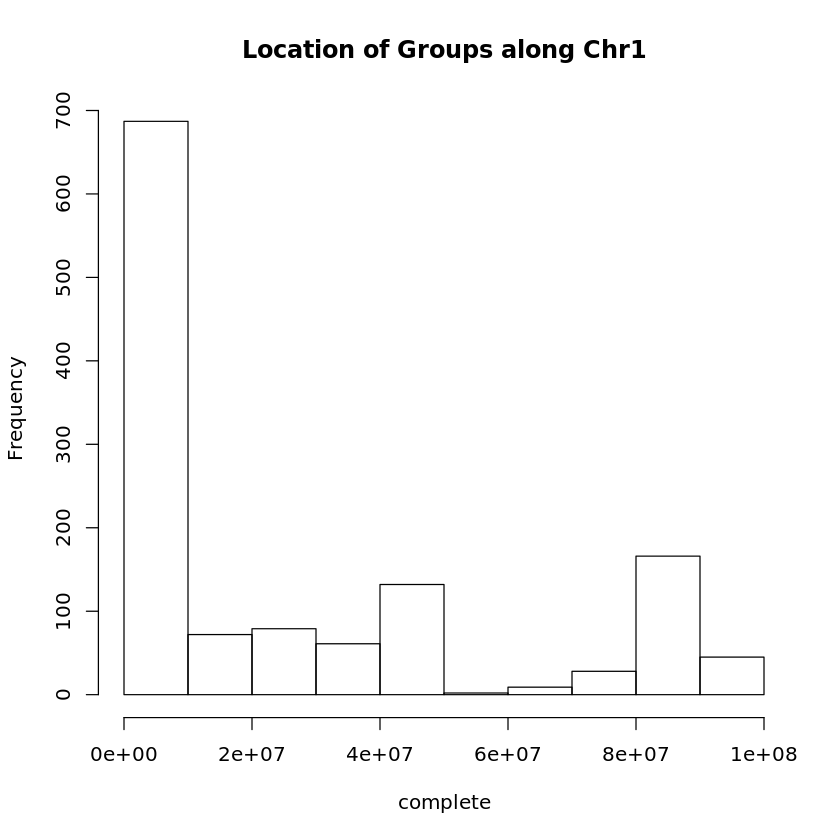

In [13]:
hist(complete, main = "Location of Groups along Chr1")

In [14]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
grouping <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
5455,chrY_694100,694000,49,0,1
5458,chrY_694200,694100,8,0,0
5460,chrY_694400,694300,11,0,0
5462,chrY_694500,694400,12,0,0
5463,chrY_695100,695000,16,7,0
5465,chrY_695200,695100,29,4,0
5531,chrY_703100,703000,20,9,0
5532,chrY_703200,703100,47,11,3
5534,chrY_703700,703600,34,11,0
5536,chrY_703800,703700,17,0,0


In [15]:
paste("Total number of bins grouped:", nrow(grouping))

[1] "Total number of bins grouped: 1281"

In [16]:
library(ggplot2)

In [17]:
pre.row <- grouping[1,]

part <- data.frame()
part <- rbind(part, pre.row)

counter = 1
sep.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        part <<- rbind(part, data.frame(binID = c(paste("gap", counter)), 
                                        start = c(0), high = c(100), medium = c(100), low = c(100)))
        counter <<- counter + 1
    }
    part <<- rbind(part, row)
    pre.row <<- row
}

invisible(apply(grouping[-1,], 1, sep.fun))

In [18]:
part[20:60,]

,binID,start,high,medium,low
20,chrY_705000,704900,30,9,0
110,gap 7,0,100,100,100
22,chrY_708600,708500,12,0,0
23,chrY_708700,708600,22,0,0
112,gap 8,0,100,100,100
25,chrY_710200,710100,14,11,5
26,chrY_710300,710200,17,14,2
113,gap 9,0,100,100,100
28,chrY_715500,715400,10,0,0
29,chrY_715600,715500,39,10,0


In [19]:
head(part)
tail(part)

,binID,start,high,medium,low
5455,chrY_694100,694000,49,0,1
2,chrY_694200,694100,8,0,0
1,gap 1,0,100,100,100
4,chrY_694400,694300,11,0,0
5,chrY_694500,694400,12,0,0
11,gap 2,0,100,100,100


,binID,start,high,medium,low
1861,chrY_90828600,90828500,8,0,0
1862,chrY_90828700,90828600,13,0,0
1863,gap 585,0,100,100,100
1864,chrY_90829800,90829700,369,48,3
1865,chrY_90829900,90829800,68,10,0
1866,chrY_90830000,90829900,55,4,1


In [20]:
write.csv(part, "chrY_A_group.csv")

[1] "Total Number of groups: 586"

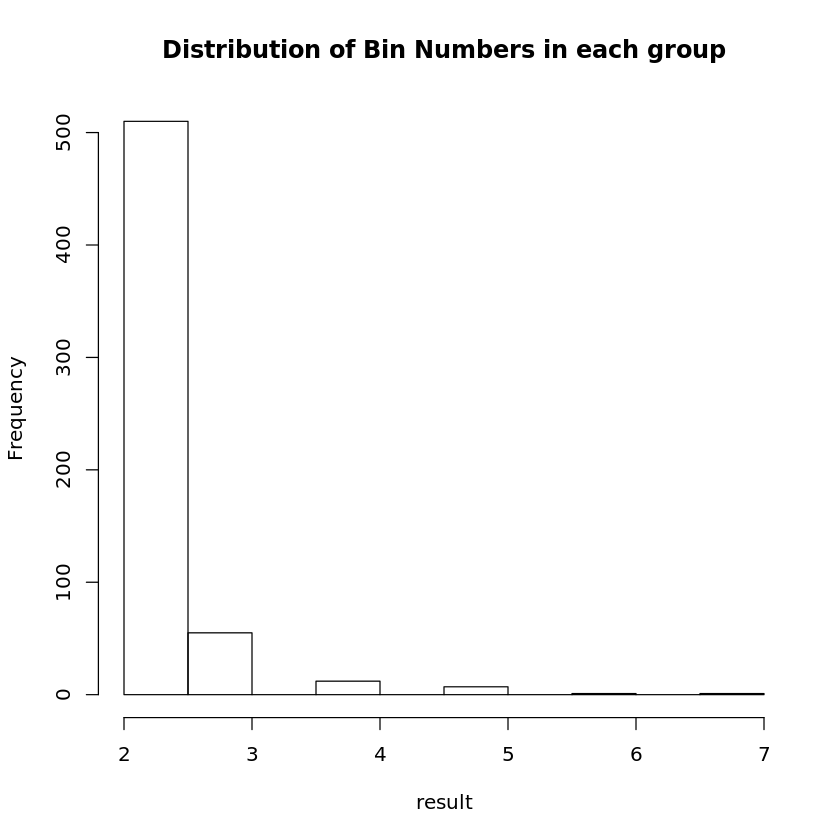

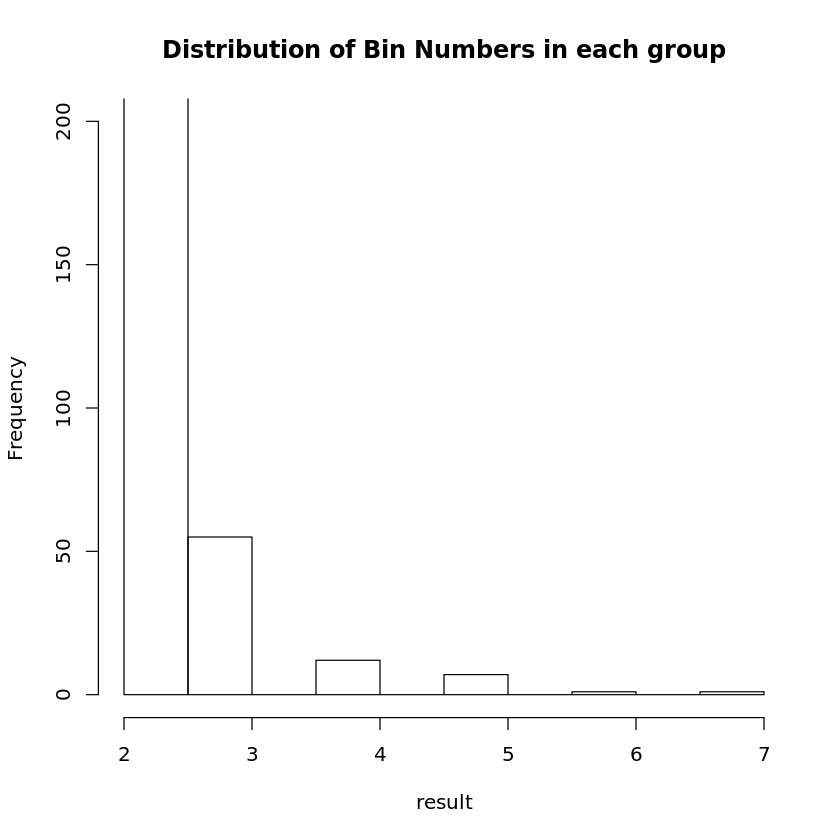

In [21]:
count = 0
result = c()
for (row in 1:nrow(part)) {
    if (substr(as.character(part[row, "binID"]), 1, 3) != "gap") {
        count = count + 1
    } else {
        result = c(result, count)
        count = 0
    }
}

result = c(result, count)

paste("Total Number of groups:", length(result))
hist(result, main = "Distribution of Bin Numbers in each group")
hist(result, ylim = c(0, 200), main = "Distribution of Bin Numbers in each group")

In [22]:
# plotdf <- data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,3])), cata = c(3))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,4])), cata = c(4)))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,5])), cata = c(5)))


# plotdf

In [23]:
# for (i in 2:nrow(part)){
#     if (substr(as.character(part[i,1]),1,3) == "gap"){
#         plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(1)))
#     } else {
#         for (j in 3:5){
#             plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(as.numeric(as.character(part[i,j]))), cata = c(j)))
#         }
#     }
    
# }

# head(plotdf, 10)

In [24]:
# plotdf$cata <- factor(plotdf$cata, levels = c(3,4,5,1), labels = c("high", "medium", "low", "gap"))

# head(plotdf,100)

In [25]:
# plotdf$bin_ID <- factor(plotdf$bin_ID, levels = unique(plotdf$bin_ID))

In [26]:
# plotdf$per <- as.numeric(as.character(plotdf$per))

In [27]:
# names(plotdf) <- c("bin_ID", "count", "cata")

In [28]:
# ggplot(data = plotdf, aes(x = bin_ID, y = count, fill = factor(cata))) + coord_flip() + 
#   geom_bar(stat = "identity", width = 2) + ylim(0, 300) + scale_fill_brewer(palette="Spectral")

In [29]:
# zoomindf <- head(plotdf, 200)
# ggplot(data = zoomindf, aes(x = bin_ID, y = count, fill = factor(cata))) + 
#   geom_bar(stat = "identity") + ylim(0, 500) + scale_fill_brewer(palette="Spectral")